## Feature Scaling

We discussed previously that the scale of the features is an important consideration when building machine learning models. Briefly:


### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques, which we will discuss throughout this section:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

In this notebook, we will discuss **Mean Normalisation**.

=================================================================

## Mean Normalisation


Mean normalisation involves centering the variable at zero, and re-scaling to the value range. The procedure involves subtracting the mean of each observation and then dividing by difference between the minimum and maximum value:

**x_scaled = (x - x_mean) / ( x_max - x_min)**


The result of the above transformation is a distribution that is centered at 0, and its minimum and maximum values are within the range of -1 to 1. The shape of a mean normalised distribution will be very similar to the original distribution of the variable, but the variance may change, so not identical.

Again, this technique will not **normalize the distribution of the data** thus if this is the desired outcome, we should implement any of the techniques discussed in variable transformation.

In a nutshell, mean normalisation:

- centers the mean at 0
- variance will be different
- may alter the shape of the original distribution
- the minimum and maximum values squeezed between -1 and 1
- preserves outliers

Good for algorithms that require features centered at zero.


## In this demo


There is no Scikit-learn transformer for mean normalisation, but we can implement it using a combination of 2 other transformers that I will discuss in detail in the next notebooks. We will also implement it manually with pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split

# the scaler - for mean normalisation
from sklearn.preprocessing import StandardScaler, RobustScaler

pd.set_option('display.max_columns', None)

3.DATASET
The dataset for this paper has been obtained 
from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Automobile).

This data set consists of three types of entities: (a) the specification of an auto in terms of various 
characteristics, (b)its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.

The second rating corresponds to the degree to which the auto is more risky than its price indicates.
Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky 
(or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process 
“symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized 
for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…),
and represents the average loss per car per year.

There are total 205 instances and 26 attributes out of which 15 are continuous, 1 is integer and 
10 are nominal. There are missing values as well.

In [2]:
# let's load the imports-85-clean-data.csv dataset

data = pd.read_csv('C:\\Users\\gusal\\machine learning\\Feature engineering\\automobile data set\\imports-85-clean-data.csv')


In [3]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes

data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,128.576317,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,104.848780,5125.369458,25.219512,30.751220,13321.278623
std,1.245307,38.606463,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,39.969861,476.979093,6.542142,6.886443,8095.996440
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,95.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,125.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


The different variables present different value ranges, mean, max, min, standard deviations, etc. In other words, they show different magnitudes or scales. Note for this demo, how **the mean values are not centered at zero, and the min and max value vary across a big range**.

When performing mean normalisation on the data set, we need to first identify the mean and minimum and maximum values of the variables. These parameters need to be learned from the train set, stored, and then used to scale test and future data. Thus, we will first divide the data set into train and test, as we have done throughout the course.

In [4]:
data.dtypes


symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [5]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
inputs = data.drop(['price'], axis = 1)
target = data.price

In [7]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(inputs,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((143, 25), (62, 25))

# we need to identify the numerical variables that can be Scaled

In [8]:
# find numerical variables
#those different from object and also excluding the target Price
features_numerical = [c for c in data.columns if data[c].dtypes!='O' and c !='price']

In [9]:
features_numerical

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [10]:
X_train_temp = X_train[features_numerical]
X_test_temp = X_test[features_numerical]


### Mean Normalisation with pandas

In [11]:
# let's first learn the mean from the train set

means = X_train_temp.mean(axis=0)
means

symboling               0.713287
normalized-losses     126.196311
wheel-base             98.998601
length                174.504895
width                  65.882517
height                 53.818881
curb-weight          2578.181818
engine-size           127.832168
bore                    3.336643
stroke                  3.271538
compression-ratio      10.408531
horsepower            104.013986
peak-rpm             5117.132867
city-mpg               25.020979
highway-mpg            30.440559
dtype: float64

In [12]:
# let's now learn the min and max values, and the value range 
# from the train set

ranges = X_train_temp.max(axis=0)-X_train_temp.min(axis=0)
ranges

symboling               5.00
normalized-losses     191.00
wheel-base             34.30
length                 63.50
width                   9.90
height                 12.00
curb-weight          2247.00
engine-size           256.00
bore                    1.12
stroke                  1.53
compression-ratio      16.00
horsepower            210.00
peak-rpm             2450.00
city-mpg               25.00
highway-mpg            31.00
dtype: float64

In [13]:
# now we are ready to perform mean normalisation:

X_train_scaled = (X_train_temp - means) / ranges
X_test_scaled = (X_test_temp - means) / ranges

In [14]:
# let's have a look at the original training dataset: mean and min, max values
# I use np.round to reduce the number of decimals to 1.

np.round(X_train_temp.describe(), 1)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0
mean,0.7,126.2,99.0,174.5,65.9,53.8,2578.2,127.8,3.3,3.3,10.4,104.0,5117.1,25.0,30.4
std,1.3,38.7,6.3,12.1,2.1,2.5,528.9,42.2,0.3,0.3,4.3,38.1,509.4,6.0,6.4
min,-2.0,65.0,86.6,144.6,61.8,47.8,1819.0,70.0,2.7,2.6,7.0,52.0,4150.0,13.0,16.0
25%,0.0,95.0,94.5,167.0,64.1,52.0,2190.5,97.5,3.1,3.2,8.6,73.0,4800.0,20.0,25.0
50%,0.0,119.0,96.9,173.2,65.4,54.1,2414.0,120.0,3.3,3.3,9.0,95.0,5100.0,24.0,30.0
75%,1.5,153.0,102.4,184.6,66.9,55.6,2975.5,145.5,3.6,3.4,9.4,116.0,5500.0,30.0,34.0
max,3.0,256.0,120.9,208.1,71.7,59.8,4066.0,326.0,3.8,4.2,23.0,262.0,6600.0,38.0,47.0


In [15]:
# let's have a look at the scaled training dataset:  mean and min, max values
# I use np.round to reduce the number of decimals to 1.

np.round(X_train_scaled.describe(), 1)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0
mean,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
std,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.2,0.2,0.2,0.2
min,-0.5,-0.3,-0.4,-0.5,-0.4,-0.5,-0.3,-0.2,-0.6,-0.4,-0.2,-0.2,-0.4,-0.5,-0.5
25%,-0.1,-0.2,-0.1,-0.1,-0.2,-0.2,-0.2,-0.1,-0.2,-0.1,-0.1,-0.1,-0.1,-0.2,-0.2
50%,-0.1,-0.0,-0.1,-0.0,-0.0,0.0,-0.1,-0.0,-0.0,0.0,-0.1,-0.0,-0.0,-0.0,-0.0
75%,0.2,0.1,0.1,0.2,0.1,0.1,0.2,0.1,0.2,0.1,-0.1,0.1,0.2,0.2,0.1
max,0.5,0.7,0.6,0.5,0.6,0.5,0.7,0.8,0.4,0.6,0.8,0.8,0.6,0.5,0.5


As expected, the mean of each variable, which were not centered at zero, is now around zero and the min and max values vary approximately between -1 and 1. Note however, that the standard deviations vary according to how spread the variable was to begin with and is highly influenced by the presence of outliers.

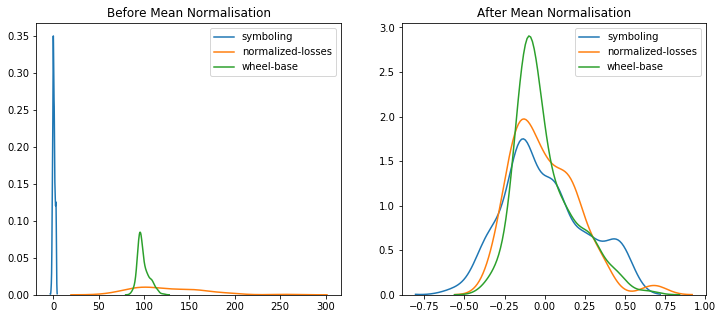

In [16]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Mean Normalisation')
sns.kdeplot(X_train_temp['symboling'], ax=ax1)
sns.kdeplot(X_train_temp['normalized-losses'], ax=ax1)
sns.kdeplot(X_train_temp['wheel-base'], ax=ax1)

# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['symboling'], ax=ax2)
sns.kdeplot(X_train_scaled['normalized-losses'], ax=ax2)
sns.kdeplot(X_train_scaled['wheel-base'], ax=ax2)
plt.show()

In [17]:
X_train_scaled.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')

As we can see the main effect of mean normalisation was to center all the distributions at zero, and the values vary between -1 and 1.

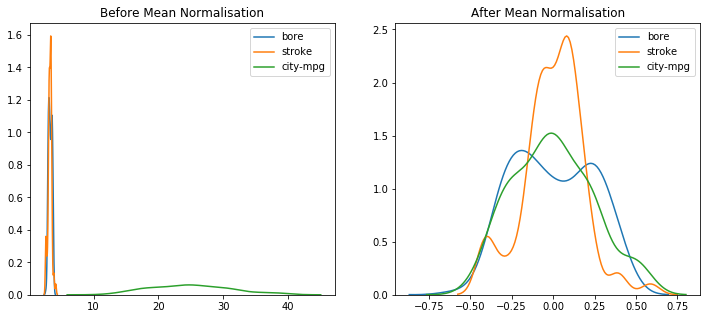

In [18]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Mean Normalisation')
sns.kdeplot(X_train_temp['bore'], ax=ax1)
sns.kdeplot(X_train_temp['stroke'], ax=ax1)
sns.kdeplot(X_train_temp['city-mpg'], ax=ax1)

# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['bore'], ax=ax2)
sns.kdeplot(X_train_scaled['stroke'], ax=ax2)
sns.kdeplot(X_train_scaled['city-mpg'], ax=ax2)
plt.show()

Compare these plots, with those derived by standardisation in the previous notebook to better understand how these procedures are not identical.

Adding the categorical variables to X_train_scaled and X_test_scaled

In [19]:
# find categorical variables
# those of type 'Object' in the dataset
features_categorical = [c for c in X_train.columns if data[c].dtypes=='O']

In [20]:
features_categorical

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [21]:
X_train_scaled = X_train_scaled.set_index(X_train.index)

In [22]:
X_train_scaled[features_categorical] = X_train[features_categorical]

In [23]:
X_train_scaled.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
40,-0.142657,-0.215687,-0.072846,0.014096,-0.341668,0.023427,-0.091759,-0.069657,-0.166646,0.201609,-0.088033,-0.085781,0.278721,0.079161,0.082563,honda,gas,std,four,sedan,fwd,front,ohc,four,1bbl
60,-0.142657,-0.058619,-0.005790,0.051891,0.062372,0.140093,-0.074847,-0.022782,0.047640,0.077426,-0.113033,-0.095305,-0.129442,0.039161,0.050305,mazda,gas,std,four,sedan,fwd,front,ohc,four,2bbl
56,0.457343,0.124627,-0.107831,-0.086691,-0.018436,-0.351573,-0.088198,-0.225907,-0.229146,-0.079437,-0.063033,-0.014352,0.360354,-0.320839,-0.240018,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
101,-0.142657,0.009443,0.040857,0.113309,0.062372,0.106760,0.230004,0.207687,0.083354,-0.001006,-0.088033,0.228505,0.033823,-0.320839,-0.272276,nissan,gas,std,four,sedan,fwd,front,ohcv,six,mpfi
86,0.057343,-0.006263,-0.078676,-0.033148,-0.048739,-0.184907,-0.077072,-0.022782,0.011926,0.123177,-0.119283,-0.076257,-0.047809,-0.000839,0.050305,mitsubishi,gas,std,four,sedan,fwd,front,ohc,four,2bbl


In [24]:
X_test_scaled = X_test_scaled.set_index(X_test.index)

In [25]:
X_test_scaled[features_categorical] = X_test[features_categorical]

In [26]:
X_test_scaled.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
52,0.057343,-0.116211,-0.171971,-0.242597,-0.169951,0.023427,-0.299591,-0.143876,-0.273789,-0.079437,-0.088033,-0.171495,-0.047809,0.239161,0.243853,mazda,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
181,-0.342657,-0.189509,0.160391,0.209372,0.062372,0.023427,0.254926,0.129562,-0.059503,0.051282,-0.075533,0.247552,0.033823,-0.240839,-0.207760,toyota,gas,std,four,wagon,rwd,front,dohc,six,mpfi
5,0.257343,0.197925,0.023364,0.044017,0.042170,-0.059907,-0.031679,0.031906,-0.130932,0.083962,-0.119283,0.028505,0.156272,-0.240839,-0.175502,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
18,0.257343,-0.027206,-0.308997,-0.526061,-0.563891,-0.051573,-0.485172,-0.261063,-0.380932,-0.157868,-0.056783,-0.266733,-0.006993,0.879161,0.727724,chevrolet,gas,std,two,hatchback,fwd,front,l,three,2bbl
188,0.257343,-0.168567,-0.049522,-0.044172,-0.038638,0.156760,-0.123801,-0.073563,-0.130932,0.083962,-0.025533,-0.019114,0.156272,0.039161,0.050305,volkswagen,gas,std,four,sedan,fwd,front,ohc,four,mpfi


## Mean Normalisation with Scikit-learn: work-around

We can implement mean normalisation by combining the use of 2 transformers. A bit dirty, if you ask me, but if you are desperate to implement this technique with sklearn, this could be a way forward.

In [27]:
inputs = data.drop(['price'], axis = 1)
target = data.price

In [28]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(inputs,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=42)

X_train.shape, X_test.shape

((143, 25), (62, 25))

In [29]:
# we need to identify the numerical variables that can be Standardized

In [30]:
# find numerical variables
#those different from object and also excluding the target Price
features_numerical = [c for c in data.columns if data[c].dtypes!='O' and c !='price']

In [31]:
features_numerical

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [32]:
X_train_temp = X_train[features_numerical]
X_test_temp = X_test[features_numerical]


In [33]:
# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the robustscaler so that it does NOT remove the median
# but normalises by max()-min(), important for this to set up the
# quantile range to 0 and 100, which represent the min and max values
scaler_minmax = RobustScaler(with_centering=False,
                             with_scaling=True,
                             quantile_range=(0, 100))

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train_temp)
scaler_minmax.fit(X_train_temp)

# transform train and test sets
X_train_scaled = scaler_minmax.transform(scaler_mean.transform(X_train_temp))
X_test_scaled = scaler_minmax.transform(scaler_mean.transform(X_test_temp))

In [34]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_temp.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_temp.columns)

In [35]:
np.round(X_train_scaled.describe(), 1)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0
mean,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0
std,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.2
min,-0.6,-0.3,-0.4,-0.5,-0.4,-0.5,-0.3,-0.2,-0.6,-0.6,-0.2,-0.2,-0.4,-0.5,-0.5
25%,-0.2,-0.2,-0.2,-0.1,-0.2,-0.1,-0.2,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.2,-0.2
50%,0.0,-0.0,-0.1,-0.0,-0.0,0.0,-0.1,-0.0,-0.0,0.0,-0.1,-0.0,0.0,-0.0,-0.0
75%,0.2,0.1,0.1,0.2,0.1,0.2,0.2,0.1,0.2,0.1,-0.0,0.0,0.1,0.2,0.1
max,0.4,0.7,0.6,0.5,0.6,0.5,0.7,0.8,0.4,0.4,0.8,0.8,0.6,0.5,0.5


See how this output is identical to when we did the scaling manually.

Adding the categorical variables to X_train_scaled and X_test_scaled

In [36]:
# find categorical variables
# those of type 'Object' in the dataset
features_categorical = [c for c in X_train.columns if data[c].dtypes=='O']

In [37]:
X_train_scaled = X_train_scaled.set_index(X_train.index)

In [38]:
X_train_scaled[features_categorical] = X_train[features_categorical]

In [39]:
X_train_scaled.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
177,-0.369231,-0.333714,0.119653,0.016289,0.048685,0.009033,-0.051285,-0.019586,-0.005045,0.135198,-0.080249,-0.062493,-0.389755,0.087273,0.054139,toyota,gas,std,four,hatchback,fwd,front,ohc,four,mpfi
75,0.030769,-0.001701,0.129998,0.064565,0.191542,0.084033,0.149872,0.050727,0.330669,-0.064802,-0.123999,0.289202,-0.063225,-0.232727,-0.203925,mercury,gas,turbo,two,hatchback,rwd,front,ohc,four,mpfi
174,-0.369231,-0.333714,0.119653,0.016289,0.048685,0.092366,-0.041494,-0.066461,-0.033616,0.044722,0.782251,-0.143001,-0.267306,0.207273,0.086397,toyota,diesel,turbo,four,sedan,fwd,front,ohc,four,idi
31,0.230769,0.043249,-0.425175,-0.518194,-0.198934,-0.249301,-0.335664,-0.136773,-0.290759,0.073293,-0.048999,-0.130289,0.344939,0.247273,0.247688,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
12,-0.169231,0.310265,0.078273,0.036979,-0.113220,0.042366,0.060864,0.144477,-0.005045,-0.031469,-0.061499,0.060389,-0.369347,-0.152727,-0.074893,bmw,gas,std,two,sedan,rwd,front,ohc,six,mpfi


In [40]:
X_test_scaled = X_test_scaled.set_index(X_test.index)

In [41]:
X_test_scaled[features_categorical] = X_test[features_categorical]

In [42]:
X_test_scaled.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
15,-0.169231,0.331207,0.157584,0.247323,0.086780,0.159033,0.292284,0.320258,0.216384,0.063770,-0.123999,0.318863,0.100041,-0.352727,-0.268441,bmw,gas,std,four,sedan,rwd,front,ohc,six,mpfi
9,-0.169231,0.153197,0.019653,0.061116,0.182018,-0.149301,0.213512,0.015570,-0.133616,0.068531,-0.186499,0.225643,0.140857,-0.352727,-0.268441,audi,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi
100,-0.169231,-0.119054,-0.059658,-0.021642,-0.075125,0.075699,-0.120711,-0.027398,0.009241,0.101865,-0.092749,-0.041306,0.018408,0.087273,0.118656,nissan,gas,std,four,sedan,fwd,front,ohc,four,2bbl
132,0.430769,0.111312,0.005860,0.205944,0.048685,0.192366,0.037722,-0.023492,0.159241,-0.088611,-0.042124,0.013779,0.038816,-0.152727,-0.074893,saab,gas,std,two,hatchback,fwd,front,ohc,four,mpfi
68,-0.369231,-0.187117,0.381722,0.280082,0.410589,0.409033,0.523704,0.218695,0.187812,0.182817,0.719751,0.068863,-0.328531,-0.112727,-0.171667,mercedes-benz,diesel,turbo,four,wagon,rwd,front,ohc,five,idi
